In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import sklearn.decomposition as dec
import sklearn.datasets as ds

In [3]:
# Load the dataset from sklearn and inspect it a bit
iris = ds.load_iris()
data = iris.data
labels = iris.target
print(iris.feature_names, iris.target_names) #our data has 4 different features with 3 different classifications

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


Text(0, 0.5, 'sepal width (cm)')

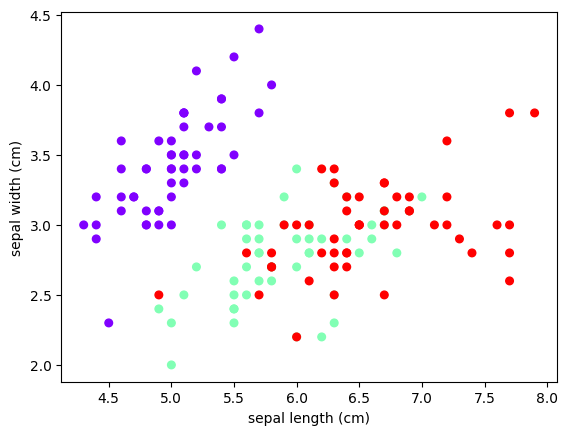

In [4]:
plt.scatter(  data[:,0]   ,data[:,1], c=labels, s=30, cmap=plt.cm.rainbow);
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


In [5]:
pca = dec.PCA()
pca_data = pca.fit_transform(data)

In [6]:
#print out principle component eigenvalues and their vairance
print("The eigenvalues are: ", pca.explained_variance_)
print("Their ratios are: ", pca.explained_variance_ratio_)

The eigenvalues are:  [4.22824171 0.24267075 0.0782095  0.02383509]
Their ratios are:  [0.92461872 0.05306648 0.01710261 0.00521218]


In [7]:
for i, eigv in zip(["first", "second", "third", "fourth"], pca.components_):
    print(f"The elements of the {i} eigenvector are: ", eigv) 

The elements of the first eigenvector are:  [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
The elements of the second eigenvector are:  [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
The elements of the third eigenvector are:  [-0.58202985  0.59791083  0.07623608  0.54583143]
The elements of the fourth eigenvector are:  [-0.31548719  0.3197231   0.47983899 -0.75365743]


Text(0, 0.5, 'PCA Component 2')

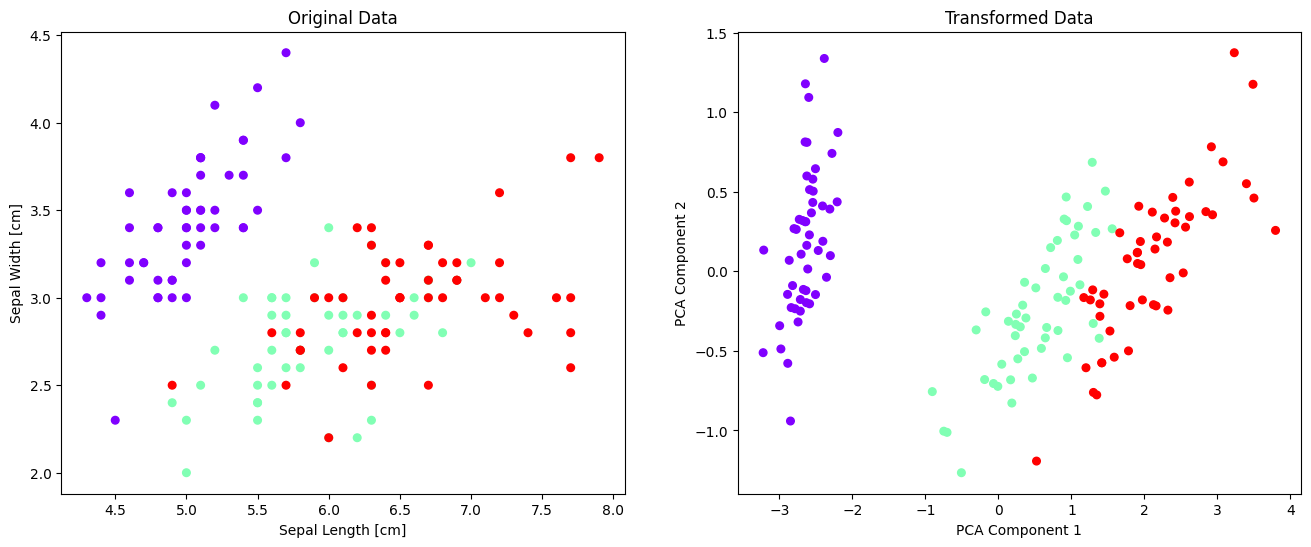

In [8]:
fig, ax = plt.subplots(1,2, figsize = (16, 6))
# Plot the original data
ax[0].scatter(iris.data[:,0], iris.data[:,1], c=labels, s=30, cmap=plt.cm.rainbow)
ax[0].set_title("Original Data")
ax[0].set_xlabel("Sepal Length [cm]")
ax[0].set_ylabel("Sepal Width [cm]")
# Plot the transformed data
ax[1].scatter(pca_data[:,0], pca_data[:,1], c=labels, s=30, cmap=plt.cm.rainbow)
ax[1].set_title("Transformed Data")
ax[1].set_xlabel("PCA Component 1")
ax[1].set_ylabel("PCA Component 2")

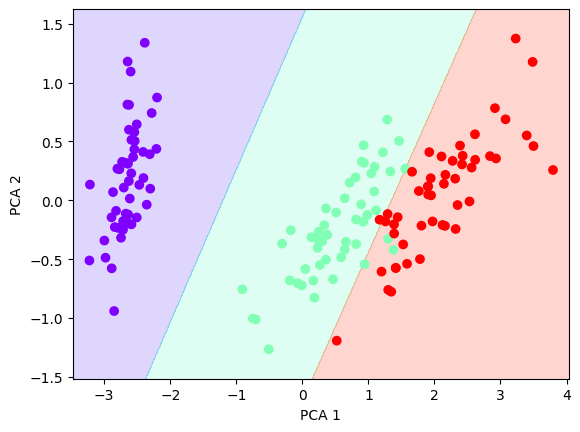

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create an SVM model with linear kernel
model = make_pipeline(StandardScaler(), SVC(kernel="linear", decision_function_shape="ovo"))
model.fit(pca_data, labels)

pca_2 = pca_data[:, :2]

def plot_decision_boundaries_2d(X_2d, y, model):
    # Create a mesh grid based on the first two dimensions
    x_min, x_max = X_2d[:, 0].min()-0.25, X_2d[:, 0].max()+0.25
    y_min, y_max = X_2d[:, 1].min()-0.25, X_2d[:, 1].max()+0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


    classify = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(yy.ravel())])  
    classify = classify.reshape(xx.shape)

    # Plot the decision boundaries
    plt.contourf(xx, yy, classify, alpha=0.2, cmap=plt.cm.rainbow)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.rainbow)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

# Call the plotting function
plot_decision_boundaries_2d(pca_2, labels, model)